In [2]:
#echo: false
#|include: false 
from myfunctions import *
myimports
import gc

In [3]:
# Configurar Seaborn para que use la paleta "viridis" como predeterminado
sns.set_palette("viridis")

# Configurar el estilo de Seaborn (opcional, para mantener un estilo uniforme)
sns.set_style("whitegrid")

# Ajustar el tamaño de las figuras predeterminado (opcional)
plt.rcParams["figure.figsize"] = (10, 6)

# Establecer opciones para mostrar todas las filas y columnas sin truncar
pd.options.display.max_rows = None  # Muestra todas las filas
pd.options.display.max_columns = None  # Muestra todas las columnas



Cargamos los datasets con la población total de estudiantes que presentaron la prueba SABER PRO entre 2016 y 2024, su información sociodemográfica y sus resultados, sin embargo, es necesario combinarlos ambos para obtener mayor información sociodemográfica y de resultados de las pruebas.

In [4]:
data2018_24=pd.read_csv('Saber_Pro_20241022.csv')
data2016_22 =pd.read_csv('poblacion2016-2022.csv')
data2016_22.head()

,PERIODO,ESTU_CONSECUTIVO,ESTU_CODDANE_COLE_TERMINO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_COMOCAPACITOEXAMENSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_HORASSEMANATRABAJA,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_SNIES_PRGMACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITAT_DESEM,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_DESEM,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_DESEM,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,PUNT_GLOBAL,filter_$,ZPUNT_GLOBAL,ZSco01
0,20203.0,EK202030341029,NaN,NaN,NaN,NaN,Secundaria (Bachillerato) completa,Educación profesional incompleta,Entre 11 y 20 horas,1202.0,UNIVERSIDAD DEL ATLANTICO-BARRANQUILLA,LICENCIATURA EN HUMANIDADES Y LENGUA CASTELLANA,106170.0,EDUCACIÓN,8001.0,ATLÁNTICO,EDUCACIÓN,8001.0,ATLÁNTICO,UNIVERSIDAD,171.0,3.0,171.0,3.0,154.0,2.0,169.0,A2,131.0,2.0,159.0,Not Selected,0.462851,0.822211
1,20203.0,EK202030286711,NaN,NaN,NaN,NaN,Técnica o tecnológica incompleta,Técnica o tecnológica incompleta,Entre 21 y 30 horas,1202.0,UNIVERSIDAD DEL ATLANTICO-BARRANQUILLA,LICENCIATURA EN HUMANIDADES Y LENGUA CASTELLANA,106170.0,EDUCACIÓN,8001.0,ATLÁNTICO,EDUCACIÓN,8001.0,ATLÁNTICO,UNIVERSIDAD,149.0,2.0,166.0,3.0,158.0,3.0,134.0,A1,165.0,3.0,154.0,Not Selected,0.260342,0.616542
2,20203.0,EK202030340888,NaN,NaN,NaN,NaN,Educación profesional incompleta,Técnica o tecnológica incompleta,Más de 30 horas,1202.0,UNIVERSIDAD DEL ATLANTICO-BARRANQUILLA,LICENCIATURA EN HUMANIDADES Y LENGUA CASTELLANA,106170.0,EDUCACIÓN,8001.0,ATLÁNTICO,EDUCACIÓN,8001.0,ATLÁNTICO,UNIVERSIDAD,159.0,3.0,177.0,3.0,153.0,2.0,161.0,A2,135.0,2.0,157.0,Not Selected,0.381847,0.739944
3,20203.0,EK202030233707,NaN,NaN,NaN,NaN,Primaria incompleta,Primaria incompleta,Menos de 10 horas,1202.0,UNIVERSIDAD DEL ATLANTICO-BARRANQUILLA,LICENCIATURA EN HUMANIDADES Y LENGUA CASTELLANA,106170.0,EDUCACIÓN,8001.0,ATLÁNTICO,EDUCACIÓN,8001.0,ATLÁNTICO,UNIVERSIDAD,118.0,1.0,124.0,1.0,131.0,2.0,101.0,A-,119.0,2.0,119.0,Not Selected,-1.157215,-0.823144
4,20203.0,EK202030312054,NaN,Menos de 500 mil,Repasó por cuenta propia,8.0,Técnica o tecnológica completa,Técnica o tecnológica completa,Entre 11 y 20 horas,1202.0,UNIVERSIDAD DEL ATLANTICO-BARRANQUILLA,LICENCIATURA EN HUMANIDADES Y LENGUA CASTELLANA,106170.0,EDUCACIÓN,8001.0,ATLÁNTICO,EDUCACIÓN,8001.0,ATLÁNTICO,UNIVERSIDAD,149.0,2.0,161.0,3.0,191.0,3.0,167.0,A2,0.0,NaN,134.0,Not Selected,-0.549690,-0.206136


In [5]:
data2018_24.head()

,PERIODO,ESTU_CONSECUTIVO,ESTU_TIPODOCUMENTO,ESTU_PAIS_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_MCPIO_RESIDE,ESTU_CODDANE_COLE_TERMINO,ESTU_COD_COLE_MCPIO_TERMINO,ESTU_COD_DEPTO_PRESENTACION,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,INST_CARACTER_ACADEMICO,ESTU_NUCLEO_PREGRADO,ESTU_INST_DEPARTAMENTO,ESTU_INST_CODMUNICIPIO,ESTU_INST_MUNICIPIO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_MUNICIPIO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_DEPTO_PRESENTACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_HORASSEMANATRABAJA,ESTU_SNIES_PRGMACADEMICO,ESTU_PRIVADO_LIBERTAD,ESTU_NACIONALIDAD,ESTU_ESTUDIANTE,ESTU_GENERO,ESTU_COLE_TERMINO,ESTU_PAGOMATRICULAPADRES,ESTU_ESTADOINVESTIGACION,ESTU_FECHANACIMIENTO,ESTU_PAGOMATRICULAPROPIO,ESTU_TIPODOCUMENTOSB11,FAMI_EDUCACIONPADRE,FAMI_TIENEAUTOMOVIL,FAMI_TIENELAVADORA,FAMI_ESTRATOVIVIENDA,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_EDUCACIONMADRE,INST_ORIGEN,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_INGLES_DESEM,MOD_LECTURA_CRITICA_PUNT,MOD_INGLES_PUNT,MOD_COMPETEN_CIUDADA_PUNT
0,20183,EK201830011083,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,NaN,NaN,11.0,2834,UNIVERSITARIA AGUSTINIANA- UNIAGUSTINIANA-BOGO...,INSTITUCIÓN UNIVERSITARIA,ADMINISTRACIÓN,BOGOTÁ,11001,BOGOTÁ D.C.,HOTELERIA Y TURISMO,BOGOTÁ,11001,BOGOTÁ D.C.,UNIVERSITARIO,PRESENCIAL,Entre 2.5 millones y menos de 4 millones,BOGOTÁ,11001.0,BOGOTÁ D.C.,No,No,Entre 11 y 20 horas,54487.0,N,COLOMBIA,ESTUDIANTE,F,NaN,Si,PUBLICAR,18/09/1997,No,CC,Primaria completa,Si,Si,Estrato 2,Si,Si,Secundaria (Bachillerato) incompleta,NO OFICIAL - CORPORACIÓN,161,174.0,3.0,A2,139,161.0,128
1,20183,EK201830053875,CC,COLOMBIA,76.0,VALLE,76736.0,SEVILLA,NaN,NaN,76.0,1203,UNIVERSIDAD DEL VALLE-CALI,UNIVERSIDAD,CONTADURÍA PUBLICA,VALLE,76001,CALI,CONTADURIA PUBLICA,VALLE,76834,TULUÁ,UNIVERSITARIO,PRESENCIAL,Menos de 500 mil,VALLE,76834.0,TULUÁ,No,No,Entre 21 y 30 horas,52346.0,N,COLOMBIA,ESTUDIANTE,M,NaN,Si,PUBLICAR,24/07/1995,No,TI,Primaria incompleta,No,Si,Estrato 2,Si,Si,Secundaria (Bachillerato) incompleta,OFICIAL DEPARTAMENTAL,147,170.0,3.0,B1,171,188.0,182
2,20183,EK201830167993,CC,COLOMBIA,73.0,TOLIMA,73001.0,IBAGUÉ,1.730010e+11,73001.0,73.0,2829,CORPORACION UNIVERSITARIA MINUTO DE DIOS -UNIM...,INSTITUCIÓN UNIVERSITARIA,CONTADURÍA PUBLICA,BOGOTÁ,11001,BOGOTÁ D.C.,CONTADURÍA PÚBLICA,BOGOTÁ,11001,BOGOTÁ D.C.,UNIVERSITARIO,DISTANCIA,Entre 1 millón y menos de 2.5 millones,TOLIMA,73001.0,IBAGUÉ,No,No,Más de 30 horas,91334.0,N,COLOMBIA,ESTUDIANTE,M,SEDE 1 GERMAN PARDO,No,PUBLICAR,18/03/1994,Si,CC,No Aplica,No,Si,Estrato 2,Si,Si,No sabe,NO OFICIAL - CORPORACIÓN,142,77.0,1.0,A1,124,130.0,153
3,20183,EK201830168158,CC,COLOMBIA,68.0,SANTANDER,68081.0,BARRANCABERMEJA,1.680810e+11,68081.0,68.0,2207,INSTITUTO UNIVERSITARIO DE LA PAZ-BARRANCABERMEJA,INSTITUCIÓN UNIVERSITARIA,"INGENIERÍA AMBIENTAL, SANITARIA Y AFINES",SANTANDER,68081,BARRANCABERMEJA,INGENIERIA AMBIENTAL Y DE SANEAMIENTO,SANTANDER,68081,BARRANCABERMEJA,UNIVERSITARIO,PRESENCIAL,Entre 500 mil y menos de 1 millón,SANTANDER,68081.0,BARRANCABERMEJA,No,No,0,3127.0,N,COLOMBIA,ESTUDIANTE,M,INSTITUTO TECNICO INDUSTRIAL,Si,PUBLICAR,29/06/1997,No,TI,Postgrado,No,Si,Estrato 2,Si,Si,Técnica o tecnológica completa,OFICIAL DEPARTAMENTAL,185,157.0,3.0,-A1,178,106.0,169
4,20183,EK201830164354,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,1.110010e+11,11001.0,11.0,1208,UNIVERSIDAD DEL QUINDIO-ARMENIA,UNIVERSIDAD,"BIBLIOTECOLOGÍA, OTROS DE CIENCIAS SOCIALES Y ...",QUINDIO,63001,ARMENIA,CIENCIAS DE LA INFORMACION Y LA DOCUMENTACION,QUINDIO,63001,ARMENIA,UNIVERSITARIO,DISTANCIA VITUAL,Entre 500 mil y menos de 1 millón,BOGOTÁ,11001.0,BOGOTÁ D.C.,No,No,Entre 21 y 30 horas,833.0,N,COLOMBIA,ESTUDIANTE,F,CENT EDUC DIST NUEVA CONSTITUCION,No,PUBLICAR,23/09/1987,Si,TI,Educación profesional completa,No,Si,Estrato 3,Si,Si,Educación

In [6]:
# Seleccionamos todas las columnas de df1 y excluimos las duplicadas de df2
df1_columns = data2016_22.columns
df2_columns = data2018_24.columns.difference(df1_columns).to_list() + ['ESTU_CONSECUTIVO']  # Conservamos la clave para el merge

# Realizamos el merge usando 'ESTU_CONSECUTIVO' como clave y un inner join
df_combined = pd.merge(data2016_22[df1_columns], data2018_24[df2_columns], on='ESTU_CONSECUTIVO', how='inner')
df_combined.to_csv('df_combined.csv', index=False)
# Verificamos el resultado
print(df_combined.head())
print("Número de registros combinados:", df_combined.shape[0])
print("Número de columnas en el dataset combinado:", df_combined.shape[1])



   PERIODO ESTU_CONSECUTIVO  ESTU_CODDANE_COLE_TERMINO  \
0  20203.0   EK202030341029                        NaN   
1  20203.0   EK202030286711                        NaN   
2  20203.0   EK202030340888                        NaN   
3  20203.0   EK202030233707                        NaN   
4  20203.0   EK202030312054                        NaN   

  ESTU_VALORMATRICULAUNIVERSIDAD ESTU_COMOCAPACITOEXAMENSB11  \
0                            NaN                         NaN   
1                            NaN                         NaN   
2                            NaN                         NaN   
3                            NaN                         NaN   
4               Menos de 500 mil    Repasó por cuenta propia   

   ESTU_SEMESTRECURSA                 FAMI_EDUCACIONPADRE  \
0                 NaN  Secundaria (Bachillerato) completa   
1                 NaN    Técnica o tecnológica incompleta   
2                 NaN    Educación profesional incompleta   
3                 NaN 

In [7]:
df_combined[df_combined['ESTU_CONSECUTIVO']=='EK202250165035']

,PERIODO,ESTU_CONSECUTIVO,ESTU_CODDANE_COLE_TERMINO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_COMOCAPACITOEXAMENSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_HORASSEMANATRABAJA,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_SNIES_PRGMACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITAT_DESEM,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_DESEM,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_DESEM,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,PUNT_GLOBAL,filter_$,ZPUNT_GLOBAL,ZSco01,ESTU_COD_COLE_MCPIO_TERMINO,ESTU_COD_DEPTO_PRESENTACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,ESTU_COLE_TERMINO,ESTU_DEPTO_PRESENTACION,ESTU_DEPTO_RESIDE,ESTU_ESTADOINVESTIGACION,ESTU_ESTUDIANTE,ESTU_FECHANACIMIENTO,ESTU_GENERO,ESTU_INST_MUNICIPIO,ESTU_MCPIO_PRESENTACION,ESTU_MCPIO_RESIDE,ESTU_METODO_PRGM,ESTU_NACIONALIDAD,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_PAIS_RESIDE,ESTU_PRGM_MUNICIPIO,ESTU_PRIVADO_LIBERTAD,ESTU_TIPODOCUMENTO,ESTU_TIPODOCUMENTOSB11,FAMI_ESTRATOVIVIENDA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,INST_ORIGEN
1216775,20225.0,EK202250165035,3.732680e+11,Entre 1 millón y menos de 2.5 millones,Repasó por cuenta propia,9.0,Primaria completa,Primaria completa,Más de 30 horas,4110.0,INSTITUTO TOLIMENSE DE FORMACION TECNICA PROFE...,TRABAJO SOCIAL,102626.0,CIENCIAS SOCIALES,73268.0,TOLIMA,"SOCIOLOGÍA, TRABAJO SOCIAL Y AFINES",73268.0,TOLIMA,TÉCNICA PROFESIONAL,98.0,1.0,107.0,1.0,101.0,1.0,98.0,A1,153.0,3.0,111.0,Not Selected,-1.26191,-0.923267,73268.0,73.0,73268.0,73.0,73268.0,"INSTITUTO DE EDUCACION FORMAL ""CECONTEC"" - SED...",TOLIMA,TOLIMA,PUBLICAR,ESTUDIANTE,23/08/1999,F,ESPINAL,ESPINAL,ESPINAL,PRESENCIAL,COLOMBIA,UNIVERSITARIO,Si,No,No,No,COLOMBIA,ESPINAL,N,CC,TI,Estrato 2,No,No,No,Si,OFICIAL NACIONAL


In [8]:
uninorte= df_combined[df_combined['INST_NOMBRE_INSTITUCION']=='UNIVERSIDAD DEL NORTE-BARRANQUILLA']
uninorte.to_csv('data_uninorte_2016-2024.csv', index=False)

print(uninorte.shape)
uninorte.sample(5)

(11587, 67)


,PERIODO,ESTU_CONSECUTIVO,ESTU_CODDANE_COLE_TERMINO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_COMOCAPACITOEXAMENSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_HORASSEMANATRABAJA,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_SNIES_PRGMACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITAT_DESEM,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_DESEM,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_DESEM,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,PUNT_GLOBAL,filter_$,ZPUNT_GLOBAL,ZSco01,ESTU_COD_COLE_MCPIO_TERMINO,ESTU_COD_DEPTO_PRESENTACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,ESTU_COLE_TERMINO,ESTU_DEPTO_PRESENTACION,ESTU_DEPTO_RESIDE,ESTU_ESTADOINVESTIGACION,ESTU_ESTUDIANTE,ESTU_FECHANACIMIENTO,ESTU_GENERO,ESTU_INST_MUNICIPIO,ESTU_MCPIO_PRESENTACION,ESTU_MCPIO_RESIDE,ESTU_METODO_PRGM,ESTU_NACIONALIDAD,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_PAIS_RESIDE,ESTU_PRGM_MUNICIPIO,ESTU_PRIVADO_LIBERTAD,ESTU_TIPODOCUMENTO,ESTU_TIPODOCUMENTOSB11,FAMI_ESTRATOVIVIENDA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,INST_ORIGEN
307555,20212.0,EK202120155100,1.080010e+11,Entre 5.5 millones y menos de 7 millones,Tomó un curso de preparación,9.0,NaN,NaN,NaN,1713.0,UNIVERSIDAD DEL NORTE-BARRANQUILLA,COMUNICACION SOCIAL Y PERIODISMO,2519.0,"COMUNICACIÓN, PERIODISMO Y PUBLICIDAD",8001.0,ATLÁNTICO,"COMUNICACIÓN SOCIAL, PERIODISMO Y AFINES",8001.0,ATLÁNTICO,UNIVERSIDAD,162.0,3.0,177.0,3.0,86.0,1.0,0.0,A1,138.0,2.0,113.0,Selected,-1.400225,NaN,8001.0,11.0,11001.0,8.0,8001.0,INSTITUCION EDUCATIVA DISTRITAL MARCO FIDEL SU...,BOGOTÁ,ATLANTICO,PUBLICAR,ESTUDIANTE,03/03/1999,F,BARRANQUILLA,BOGOTÁ D.C.,BARRANQUILLA,PRESENCIAL,COLOMBIA,UNIVERSITARIO,No,Si,No,No,COLOMBIA,BARRANQUILLA,N,CC,TI,NaN,NaN,NaN,NaN,NaN,NO OFICIAL - FUNDACIÓN
275246,20212.0,EK202120084351,3.080010e+11,Más de 7 millones,No realizó ninguna prueba de preparación,7.0,Postgrado,Postgrado,0,1713.0,UNIVERSIDAD DEL NORTE-BARRANQUILLA,CIENCIA POLITICA Y GOBIERNO,53075.0,CIENCIAS SOCIALES,8001.0,ATLÁNTICO,"CIENCIA POLÍTICA, RELACIONES INTERNACIONALES",8001.0,ATLÁNTICO,UNIVERSIDAD,186.0,3.0,188.0,3.0,208.0,4.0,211.0,B2,152.0,3.0,189.0,Selected,1.677900,NaN,8001.0,11.0,11001.0,8.0,8001.0,NUEVO COL DEL PRADO,BOGOTÁ,ATLANTICO,PUBLICAR,ESTUDIANTE,07/12/2000,M,BARRANQUILLA,BOGOTÁ D.C.,BARRANQUILLA,PRESENCIAL,COLOMBIA,UNIVERSITARIO,Si,No,No,No,COLOMBIA,BARRANQUILLA,N,CC,TI,Estrato 5,Si,Si,Si,Si,NO OFICIAL - FUNDACIÓN
81267,20203.0,EK202030087198,3.080010e+11,Más de 7 millones,Tomó un curso de preparación,10.0,Educación profesional completa,Educación profesional completa,0,1713.0,UNIVERSIDAD DEL NORTE-BARRANQUILLA,ADMINISTRACION DE EMPRESAS,1272.0,ADMINISTRACIÓN Y AFINES,8001.0,ATLÁNTICO,ADMINISTRACIÓN,8001.0,ATLÁNTICO,UNIVERSIDAD,141.0,2.0,148.0,2.0,147.0,2.0,203.0,B2,153.0,3.0,158.0,Selected,0.422349,NaN,8001.0,11.0,11001.0,8.0,8001.0,COL GUILLERMO CAREY,BOGOTÁ,ATLANTICO,PUBLICAR,ESTUDIANTE,08/11/1997,M,BARRANQUILLA,BOGOTÁ D.C.,BARRANQUILLA,PRESENCIAL,COLOMBIA,UNIVERSITARIO,No,Si,Si,No,COLOMBIA,BARRANQUILLA,N,CC,TI,Estrato 2,No,Si,Si,Si,NO OFICIAL - FUNDACIÓN
996071,20212.0,EK202120226044,3.080010e+11,Más de 7 millones,Repasó por cuenta propia,11.0,Educación profesional completa,Educación profesional completa,Más de 30 horas,1713.0,UNIVERSIDAD DEL NORTE-BARRANQUILLA,MEDICINA,1269.0,MEDICINA,8001.0,ATLÁNTICO,MEDICINA,8001.0,ATLÁNTICO,UNIVERSIDAD,210.0,4.0,109.0,1.0,168.0,3.0,224.0,B2,180.0,3.0,178.0,Selected,1.232382,NaN,8001.0,11.0,11001.0,11.0,11001.0,COLEGIO MARYMOUNT - SEDE PRINCIPAL,BOGOTÁ,BOGOTÁ,PUBLICAR,ESTUDIANTE,26/09/1998,F,BARRANQUILLA,BOGOTÁ D.C.,BOGOTÁ D.C.,PRESENCIAL,COLOMBIA,UNIVERSITARIO,Si,Si,Si,No,COLOMBI

## EXPLORATORY DATA ANALYSIS

Conozcamos la naturaleza de los datos de cada columna y cuantas categorías tienen

In [9]:
print(f'los datos de poblacion son de tamaño {df_combined.shape}')
print(f'la muestra de UNINORTE es de tamaño {uninorte.shape}')

los datos de poblacion son de tamaño (1220552, 67)
la muestra de UNINORTE es de tamaño (11587, 67)


In [10]:
# Supongamos que tienes varios DataFrames grandes que ya no necesitas
del data2016_22, data2018_24
gc.collect()  # Forzar la liberación de memoria


0

Conociendo los datos del dataset general

In [11]:
df_combined.describe(include='object')

,ESTU_CONSECUTIVO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_COMOCAPACITOEXAMENSB11,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_HORASSEMANATRABAJA,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_DEPARTAMENTO,ESTU_NUCLEO_PREGRADO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,MOD_INGLES_DESEM,filter_$,ESTU_COLE_TERMINO,ESTU_DEPTO_PRESENTACION,ESTU_DEPTO_RESIDE,ESTU_ESTADOINVESTIGACION,ESTU_ESTUDIANTE,ESTU_FECHANACIMIENTO,ESTU_GENERO,ESTU_INST_MUNICIPIO,ESTU_MCPIO_PRESENTACION,ESTU_MCPIO_RESIDE,ESTU_METODO_PRGM,ESTU_NACIONALIDAD,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_PAIS_RESIDE,ESTU_PRGM_MUNICIPIO,ESTU_PRIVADO_LIBERTAD,ESTU_TIPODOCUMENTO,ESTU_TIPODOCUMENTOSB11,FAMI_ESTRATOVIVIENDA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,INST_ORIGEN
count,1220552,1208456,1209155,1179257,1178457,1164921,1220552,1220552,958066,1220552,1220552,1220552,1220552,1220438,1220552,843854,1220448,1217162,1220552,1220552,1220551,1220433,1220552,1220448,1217162,1220552,1220552,1220552,1207973,1208053,1208172,1208104,1220552,1220552,1220552,1220552,1194483,1165367,1144213,1155530,1172918,1152715,1220552
unique,1210065,8,3,12,12,5,272,1024,22,38,58,33,4,5,2,26377,74,51,1,1,16934,2,61,164,1044,3,86,1,2,2,2,2,86,160,2,9,6,7,2,2,2,2,6
top,EK202250163574,Entre 1 millón y menos de 2.5 millones,Repasó por cuenta propia,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Más de 30 horas,CORPORACION UNIVERSITARIA MINUTO DE DIOS -UNIM...,DERECHO,ADMINISTRACIÓN Y AFINES,BOGOTÁ,ADMINISTRACIÓN,BOGOTÁ,UNIVERSIDAD,A2,Not Selected,0,BOGOTÁ,BOGOTÁ,PUBLICAR,ESTUDIANTE,17/09/1997,F,BOGOTÁ D.C.,BOGOTÁ D.C.,BOGOTÁ D.C.,PRESENCIAL,COLOMBIA,UNIVERSITARIO,No,No,Si,No,COLOMBIA,BOGOTÁ D.C.,N,CC,TI,Estrato 2,No,Si,Si,Si,NO OFICIAL - CORPORACIÓN
freq,4,350001,815967,227623,250681,440951,90074,92639,206018,494106,250832,551610,738249,462175,1208965,24353,739797,328134,1220552,1220552,520,719943,551610,739797,328134,954358,1218149,1220552,952122,824891,604593,677684,1218149,494103,1220486,1214845,829874,410483,732037,1048984,1043836,991931,429492


## Evaluación y Manejo de Nulos

<Axes: >

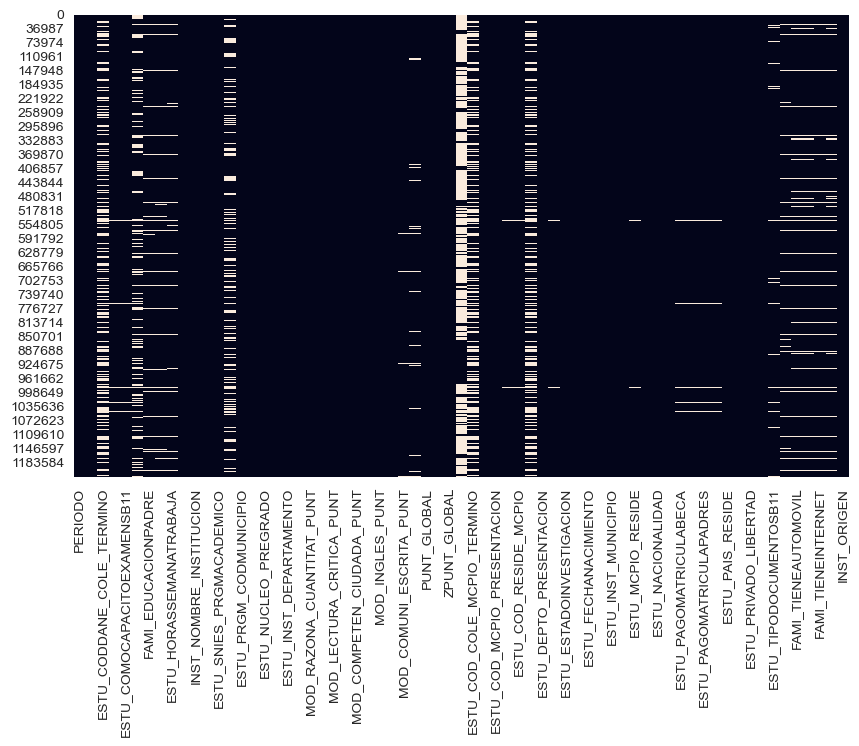

In [12]:
sns.heatmap(df_combined.isnull(), cbar=False)

In [13]:
df_combined.drop(['ZPUNT_GLOBAL','ESTU_CODDANE_COLE_TERMINO','filter_$','ZSco01' ], axis=1, inplace=True)

In [14]:
df_combined.isnull().sum()/df_combined.shape[0]*100

PERIODO                            0.000000
ESTU_CONSECUTIVO                   0.000000
ESTU_VALORMATRICULAUNIVERSIDAD     0.991027
ESTU_COMOCAPACITOEXAMENSB11        0.933758
ESTU_SEMESTRECURSA                20.703911
FAMI_EDUCACIONPADRE                3.383305
FAMI_EDUCACIONMADRE                3.448849
ESTU_HORASSEMANATRABAJA            4.557856
INST_COD_INSTITUCION               0.000000
INST_NOMBRE_INSTITUCION            0.000000
ESTU_PRGM_ACADEMICO                0.000000
ESTU_SNIES_PRGMACADEMICO           0.000164
GRUPOREFERENCIA                   21.505516
ESTU_PRGM_CODMUNICIPIO             0.000000
ESTU_PRGM_DEPARTAMENTO             0.000000
ESTU_NUCLEO_PREGRADO               0.000000
ESTU_INST_CODMUNICIPIO             0.000000
ESTU_INST_DEPARTAMENTO             0.000000
INST_CARACTER_ACADEMICO            0.000000
MOD_RAZONA_CUANTITAT_PUNT          0.000000
MOD_RAZONA_CUANTITAT_DESEM         0.000000
MOD_LECTURA_CRITICA_PUNT           0.000000
MOD_LECTURA_CRITICA_DESEM       

In [15]:
keep_float=['PUNT_GLOBAL','MOD_COMUNI_ESCRITA_PUNT','MOD_COMPETEN_CIUDADA_PUNT','MOD_LECTURA_CRITICA_PUNT','MOD_RAZONA_CUANTITAT_PUNT','MOD_INGLES_PUNT']
for col in df_combined.columns:
    if col not in keep_float:
        df_combined.fillna({col:'sin_informacion'}, inplace=True)
        df_combined[col]=df_combined[col].astype(str)

In [16]:
df_combined.isnull().sum()/df_combined.shape[0]*100

PERIODO                           0.000000
ESTU_CONSECUTIVO                  0.000000
ESTU_VALORMATRICULAUNIVERSIDAD    0.000000
ESTU_COMOCAPACITOEXAMENSB11       0.000000
ESTU_SEMESTRECURSA                0.000000
FAMI_EDUCACIONPADRE               0.000000
FAMI_EDUCACIONMADRE               0.000000
ESTU_HORASSEMANATRABAJA           0.000000
INST_COD_INSTITUCION              0.000000
INST_NOMBRE_INSTITUCION           0.000000
ESTU_PRGM_ACADEMICO               0.000000
ESTU_SNIES_PRGMACADEMICO          0.000000
GRUPOREFERENCIA                   0.000000
ESTU_PRGM_CODMUNICIPIO            0.000000
ESTU_PRGM_DEPARTAMENTO            0.000000
ESTU_NUCLEO_PREGRADO              0.000000
ESTU_INST_CODMUNICIPIO            0.000000
ESTU_INST_DEPARTAMENTO            0.000000
INST_CARACTER_ACADEMICO           0.000000
MOD_RAZONA_CUANTITAT_PUNT         0.000000
MOD_RAZONA_CUANTITAT_DESEM        0.000000
MOD_LECTURA_CRITICA_PUNT          0.000000
MOD_LECTURA_CRITICA_DESEM         0.000000
MOD_COMPETE

In [17]:
df_combined.dtypes

PERIODO                            object
ESTU_CONSECUTIVO                   object
ESTU_VALORMATRICULAUNIVERSIDAD     object
ESTU_COMOCAPACITOEXAMENSB11        object
ESTU_SEMESTRECURSA                 object
FAMI_EDUCACIONPADRE                object
FAMI_EDUCACIONMADRE                object
ESTU_HORASSEMANATRABAJA            object
INST_COD_INSTITUCION               object
INST_NOMBRE_INSTITUCION            object
ESTU_PRGM_ACADEMICO                object
ESTU_SNIES_PRGMACADEMICO           object
GRUPOREFERENCIA                    object
ESTU_PRGM_CODMUNICIPIO             object
ESTU_PRGM_DEPARTAMENTO             object
ESTU_NUCLEO_PREGRADO               object
ESTU_INST_CODMUNICIPIO             object
ESTU_INST_DEPARTAMENTO             object
INST_CARACTER_ACADEMICO            object
MOD_RAZONA_CUANTITAT_PUNT         float64
MOD_RAZONA_CUANTITAT_DESEM         object
MOD_LECTURA_CRITICA_PUNT          float64
MOD_LECTURA_CRITICA_DESEM          object
MOD_COMPETEN_CIUDADA_PUNT         

In [18]:
cols_low=[]
cols_hight=[]
cols_unica=[]

for col in df_combined.columns:
    if df_combined[col].nunique()==1:
        cols_unica.append(col)     
        print(f'La columna {col} tiene categoría unica')   
    elif df_combined[col].nunique()<100:
        cols_low.append(col)
        print(df_combined[col].value_counts())
    else:
        cols_hight.append(col)
        print(f'La columna {col} tiene mas de 100 categorías')

print(f'El dataset tiene {len(cols_low)} columnas de baja frecuencia')
print(f'El dataset tiene {len(cols_hight)} columnas de alta frecuencia')
print(f'El dataset tiene {len(cols_unica)} columnas con valores unicos')


PERIODO
20195.0    258028
20212.0    246663
20203.0    245720
20183.0    233740
20225.0    131752
20222.0     97889
20194.0      2076
20213.0      1670
20226.0      1060
20202.0       680
20223.0       674
20184.0       372
20196.0       228
Name: count, dtype: int64
La columna ESTU_CONSECUTIVO tiene mas de 100 categorías
ESTU_VALORMATRICULAUNIVERSIDAD
Entre 1 millón y menos de 2.5 millones      350001
Entre 2.5 millones y menos de 4 millones    220748
Menos de 500 mil                            138714
Entre 500 mil y menos de 1 millón           129272
Entre 4 millones y menos de 5.5 millones    125279
Más de 7 millones                           124028
Entre 5.5 millones y menos de 7 millones     69090
No pagó matrícula                            51324
sin_informacion                              12096
Name: count, dtype: int64
ESTU_COMOCAPACITOEXAMENSB11
Repasó por cuenta propia                    815967
No realizó ninguna prueba de preparación    269095
Tomó un curso de preparación  

In [19]:
uninorte=pd.read_csv('data_uninorte_2016-2024.csv')
uninorte.head()

,PERIODO,ESTU_CONSECUTIVO,ESTU_CODDANE_COLE_TERMINO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_COMOCAPACITOEXAMENSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_HORASSEMANATRABAJA,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_SNIES_PRGMACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITAT_DESEM,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_DESEM,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_DESEM,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,PUNT_GLOBAL,filter_$,ZPUNT_GLOBAL,ZSco01,ESTU_COD_COLE_MCPIO_TERMINO,ESTU_COD_DEPTO_PRESENTACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,ESTU_COLE_TERMINO,ESTU_DEPTO_PRESENTACION,ESTU_DEPTO_RESIDE,ESTU_ESTADOINVESTIGACION,ESTU_ESTUDIANTE,ESTU_FECHANACIMIENTO,ESTU_GENERO,ESTU_INST_MUNICIPIO,ESTU_MCPIO_PRESENTACION,ESTU_MCPIO_RESIDE,ESTU_METODO_PRGM,ESTU_NACIONALIDAD,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_PAIS_RESIDE,ESTU_PRGM_MUNICIPIO,ESTU_PRIVADO_LIBERTAD,ESTU_TIPODOCUMENTO,ESTU_TIPODOCUMENTOSB11,FAMI_ESTRATOVIVIENDA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,INST_ORIGEN
0,20183.0,EK201830044167,3.080010e+11,Más de 7 millones,Repasó por cuenta propia,NaN,Educación profesional completa,Técnica o tecnológica incompleta,0,1713.0,UNIVERSIDAD DEL NORTE-BARRANQUILLA,ADMINISTRACION DE EMPRESAS,1272.0,ADMINISTRACIÓN Y AFINES,8001.0,ATLÁNTICO,ADMINISTRACIÓN,8001.0,ATLÁNTICO,UNIVERSIDAD,171.0,3.0,186.0,3.0,162.0,3.0,217.0,B2,144.0,2.0,176.0,Selected,1.151378,NaN,8001.0,8.0,8001.0,8.0,8001.0,COLEGIO MARYMOUNT - SEDE PRINCIPAL,ATLANTICO,ATLANTICO,PUBLICAR,ESTUDIANTE,22/02/1996,F,BARRANQUILLA,BARRANQUILLA,BARRANQUILLA,PRESENCIAL,COLOMBIA,UNIVERSITARIO,No,No,Si,No,COLOMBIA,BARRANQUILLA,N,CC,CC,Estrato 6,Si,Si,Si,Si,NO OFICIAL - FUNDACIÓN
1,20183.0,EK201830053387,3.080010e+11,Más de 7 millones,Repasó por cuenta propia,NaN,Postgrado,Postgrado,Más de 30 horas,1713.0,UNIVERSIDAD DEL NORTE-BARRANQUILLA,ADMINISTRACION DE EMPRESAS,1272.0,ADMINISTRACIÓN Y AFINES,8001.0,ATLÁNTICO,ADMINISTRACIÓN,8001.0,ATLÁNTICO,UNIVERSIDAD,195.0,3.0,180.0,3.0,154.0,2.0,300.0,B2,155.0,3.0,197.0,Selected,2.001913,NaN,8001.0,8.0,8001.0,8.0,8001.0,COLEGIO MARYMOUNT - SEDE PRINCIPAL,ATLANTICO,ATLANTICO,PUBLICAR,ESTUDIANTE,11/10/1995,M,BARRANQUILLA,BARRANQUILLA,BARRANQUILLA,PRESENCIAL,COLOMBIA,UNIVERSITARIO,No,No,Si,No,COLOMBIA,BARRANQUILLA,N,CC,TI,Estrato 6,Si,Si,Si,Si,NO OFICIAL - FUNDACIÓN
2,20183.0,EK201830044144,1.080010e+11,Más de 7 millones,No realizó ninguna prueba de preparación,NaN,Primaria completa,Educación profesional completa,0,1713.0,UNIVERSIDAD DEL NORTE-BARRANQUILLA,ADMINISTRACION DE EMPRESAS,1272.0,ADMINISTRACIÓN Y AFINES,8001.0,ATLÁNTICO,ADMINISTRACIÓN,8001.0,ATLÁNTICO,UNIVERSIDAD,167.0,3.0,168.0,3.0,166.0,3.0,227.0,B2,129.0,2.0,171.0,Selected,0.948870,NaN,8001.0,8.0,8001.0,8.0,8001.0,INSTITUCION EDUCATIVA DISTRITAL SAGRADO CORAZO...,ATLANTICO,ATLANTICO,PUBLICAR,ESTUDIANTE,12/11/1995,M,BARRANQUILLA,BARRANQUILLA,BARRANQUILLA,PRESENCIAL,COLOMBIA,UNIVERSITARIO,No,No,Si,No,COLOMBIA,BARRANQUILLA,N,CC,CC,Estrato 6,Si,Si,Si,Si,NO OFICIAL - FUNDACIÓN
3,20183.0,EK201830190504,3.080010e+11,Más de 7 millones,No realizó ninguna prueba de preparación,NaN,Educación profesional completa,Técnica o tecnológica completa,Entre 11 y 20 horas,1713.0,UNIVERSIDAD DEL NORTE-BARRANQUILLA,ADMINISTRACION DE EMPRESAS,1272.0,ADMINISTRACIÓN Y AFINES,8001.0,ATLÁNTICO,ADMINISTRACIÓN,8001.0,ATLÁNTICO,UNIVERSIDAD,159.0,3.0,131.0,2.0,155.0,2.0,205.0,B2,136.0,2.0,157.0,Selected,0.381847,NaN,8001.0,8.0,8001.0,8.0,8001.0,COL DEL SAGRADO CORAZON - CALLE 74,ATLANTICO,ATLANTICO,PUBLICAR,ESTUDIANTE,15/12/1996,M,BARRANQUILLA,BARRANQUILLA,BARRANQUILLA,PRESENCIAL,COLOMBIA,UNIVE

In [20]:
keep_float=['PUNT_GLOBAL','MOD_COMUNI_ESCRITA_PUNT','MOD_COMPETEN_CIUDADA_PUNT','MOD_LECTURA_CRITICA_PUNT','MOD_RAZONA_CUANTITAT_PUNT','MOD_INGLES_PUNT']
for col in uninorte.columns:
    if col not in keep_float:
        uninorte.fillna({col:'sin_informacion'}, inplace=True)
        uninorte[col]=uninorte[col].astype(str)

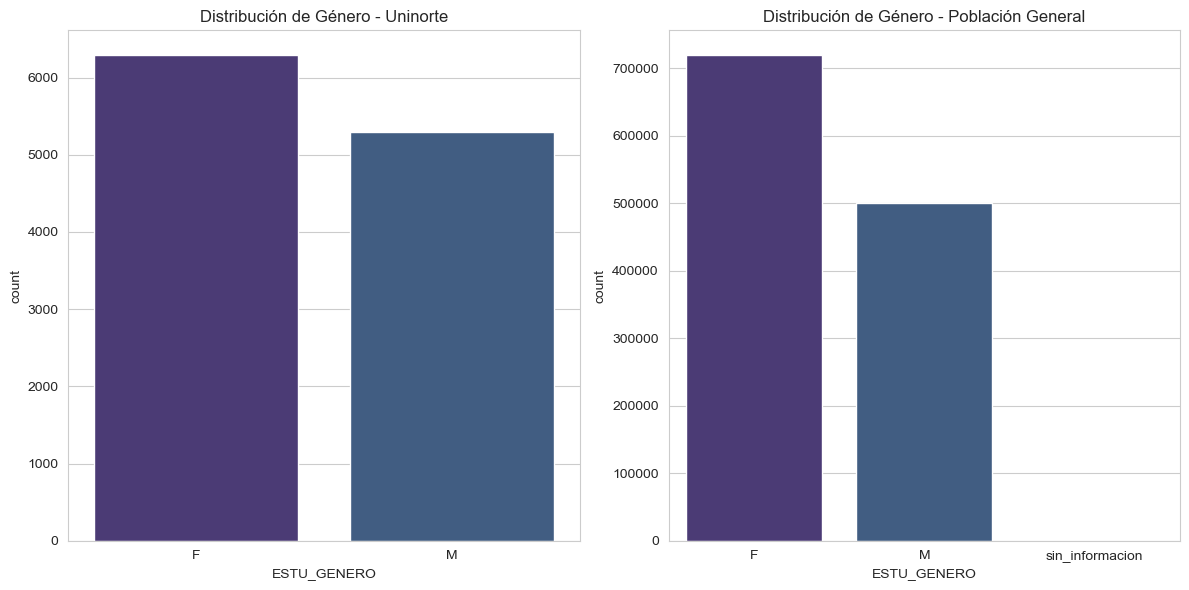

In [21]:
# Obtener las categorías únicas excluyendo nulos y convertirlas a strings
category_order = sorted(df_combined['FAMI_ESTRATOVIVIENDA'].dropna().astype(str).unique())

# Crear un diccionario de colores para cada categoría
palette_dict = dict(zip(category_order, sns.color_palette("viridis", len(category_order))))
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Gráfico para Uninorte
sns.countplot(data=uninorte, x='ESTU_GENERO', hue='ESTU_GENERO', legend=False,  ax=ax[0])
ax[0].set_title('Distribución de Género - Uninorte')

# Gráfico para la población general
sns.countplot(data=df_combined, x='ESTU_GENERO',hue='ESTU_GENERO', legend=False,  ax=ax[1])
ax[1].set_title('Distribución de Género - Población General')

plt.tight_layout()
plt.show()


C:\Users\fredy\AppData\Local\Temp\ipykernel_11288\4080011339.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x
C:\Users\fredy\AppData\Local\Temp\ipykernel_11288\4080011339.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x


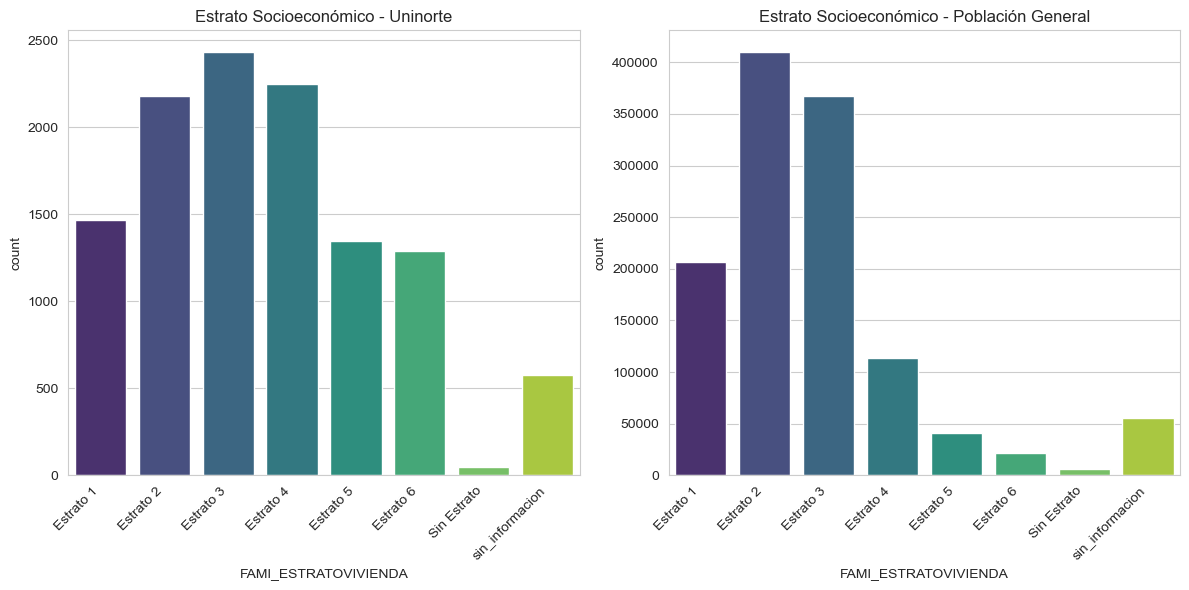

In [22]:
# Obtener las categorías únicas excluyendo nulos y convertirlas a strings
category_order = sorted(df_combined['FAMI_ESTRATOVIVIENDA'].unique())

# Crear un diccionario de colores para cada categoría
palette_dict = dict(zip(category_order, sns.color_palette("viridis", len(category_order))))

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Gráfico para Uninorte
sns.countplot(data=uninorte, x='FAMI_ESTRATOVIVIENDA', hue='FAMI_ESTRATOVIVIENDA', 
              order=category_order, palette=palette_dict, ax=ax[0])
ax[0].set_title('Estrato Socioeconómico - Uninorte')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x

# Gráfico para la población general
sns.countplot(data=df_combined, x='FAMI_ESTRATOVIVIENDA', hue='FAMI_ESTRATOVIVIENDA', 
              order=category_order, palette=palette_dict, ax=ax[1])
ax[1].set_title('Estrato Socioeconómico - Población General')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x

plt.tight_layout()
plt.show()




C:\Users\fredy\AppData\Local\Temp\ipykernel_11288\797808077.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x
C:\Users\fredy\AppData\Local\Temp\ipykernel_11288\797808077.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x


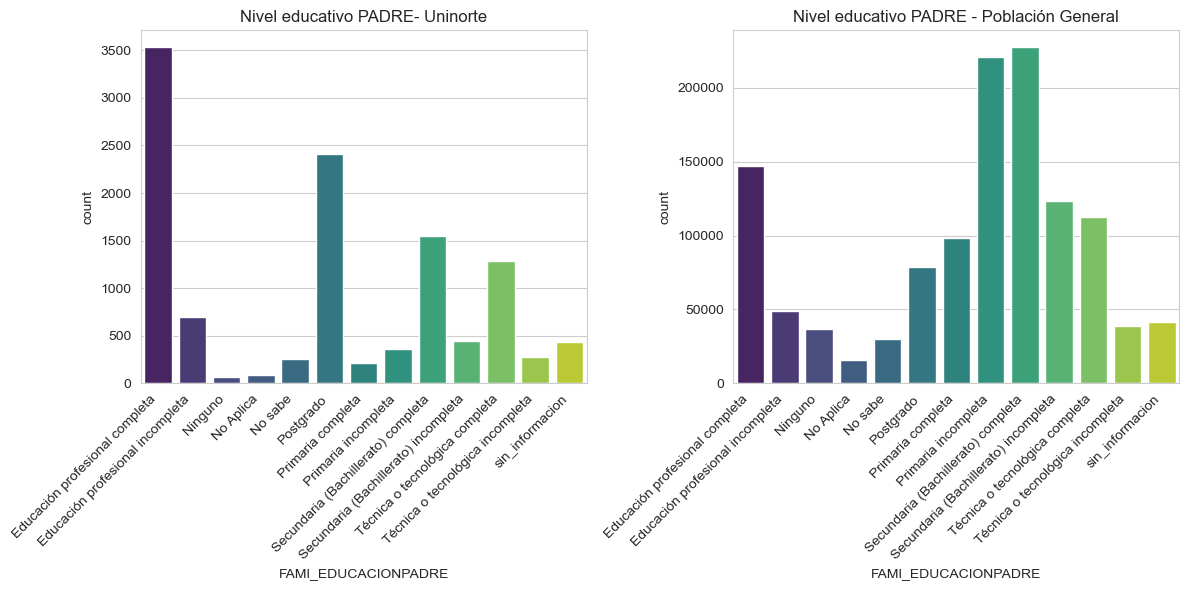

In [24]:
# Obtener las categorías únicas excluyendo nulos y convertirlas a strings
category_order = sorted(df_combined['FAMI_EDUCACIONPADRE'].unique())

# Crear un diccionario de colores para cada categoría
palette_dict = dict(zip(category_order, sns.color_palette("viridis", len(category_order))))

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Gráfico para Uninorte
sns.countplot(data=uninorte, x='FAMI_EDUCACIONPADRE', hue='FAMI_EDUCACIONPADRE', 
              order=category_order, palette=palette_dict, ax=ax[0])
ax[0].set_title('Nivel educativo PADRE- Uninorte')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x

# Gráfico para la población general
sns.countplot(data=df_combined, x='FAMI_EDUCACIONPADRE', hue='FAMI_EDUCACIONPADRE', 
              order=category_order, palette=palette_dict, ax=ax[1])
ax[1].set_title('Nivel educativo PADRE - Población General')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x

plt.tight_layout()
plt.show()


C:\Users\fredy\AppData\Local\Temp\ipykernel_11288\2164095467.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x
C:\Users\fredy\AppData\Local\Temp\ipykernel_11288\2164095467.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x


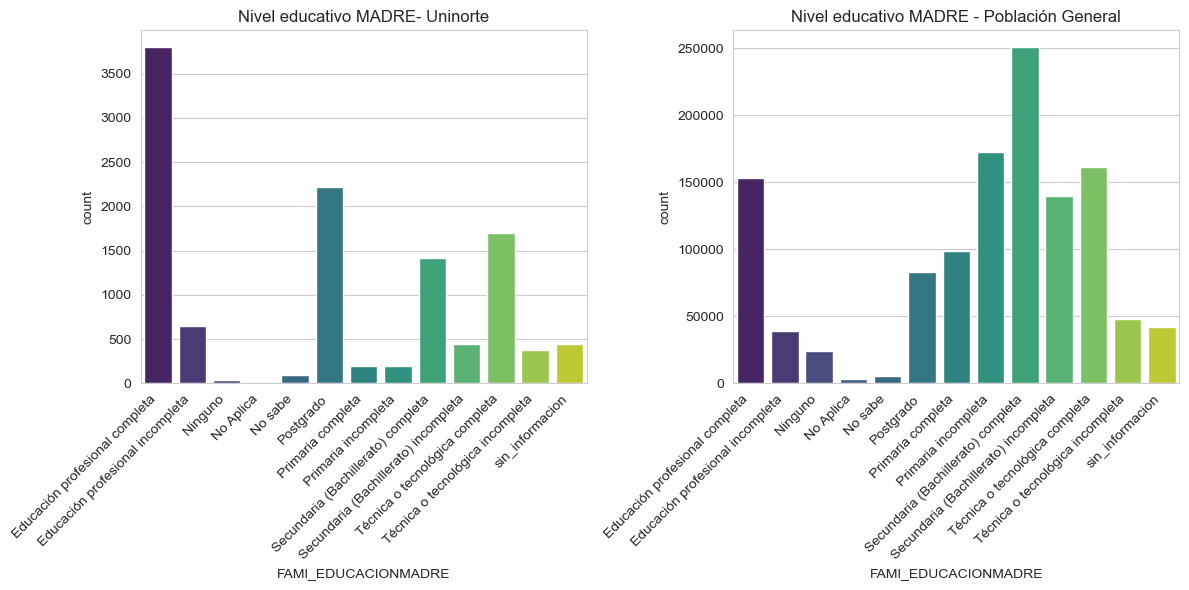

In [26]:
# Obtener las categorías únicas excluyendo nulos y convertirlas a strings
category_order = sorted(df_combined['FAMI_EDUCACIONMADRE'].unique())

# Crear un diccionario de colores para cada categoría
palette_dict = dict(zip(category_order, sns.color_palette("viridis", len(category_order))))

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Gráfico para Uninorte
sns.countplot(data=uninorte, x='FAMI_EDUCACIONMADRE', hue='FAMI_EDUCACIONMADRE', 
              order=category_order, palette=palette_dict, ax=ax[0])
ax[0].set_title('Nivel educativo MADRE- Uninorte')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x

# Gráfico para la población general
sns.countplot(data=df_combined, x='FAMI_EDUCACIONMADRE', hue='FAMI_EDUCACIONMADRE', 
              order=category_order, palette=palette_dict, ax=ax[1])
ax[1].set_title('Nivel educativo MADRE - Población General')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x

plt.tight_layout()
plt.show()


C:\Users\fredy\AppData\Local\Temp\ipykernel_11288\3508122260.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x
C:\Users\fredy\AppData\Local\Temp\ipykernel_11288\3508122260.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x


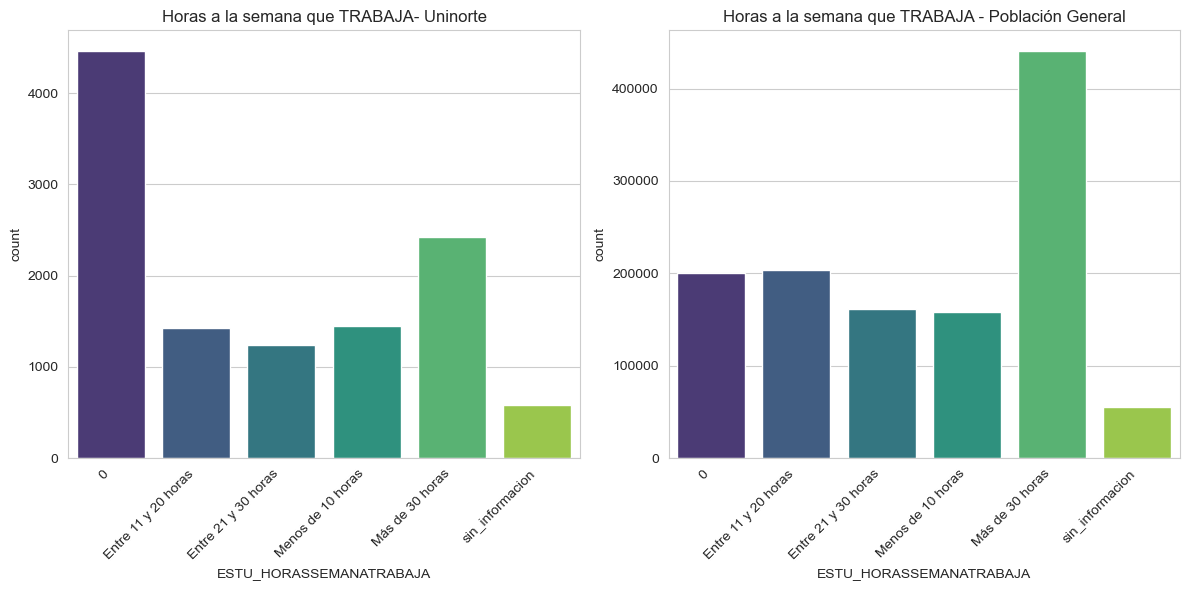

In [27]:
# Obtener las categorías únicas excluyendo nulos y convertirlas a strings
category_order = sorted(df_combined['ESTU_HORASSEMANATRABAJA'].unique())

# Crear un diccionario de colores para cada categoría
palette_dict = dict(zip(category_order, sns.color_palette("viridis", len(category_order))))

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Gráfico para Uninorte
sns.countplot(data=uninorte, x='ESTU_HORASSEMANATRABAJA', hue='ESTU_HORASSEMANATRABAJA', 
              order=category_order, palette=palette_dict, ax=ax[0])
ax[0].set_title('Horas a la semana que TRABAJA- Uninorte')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x

# Gráfico para la población general
sns.countplot(data=df_combined, x='ESTU_HORASSEMANATRABAJA', hue='ESTU_HORASSEMANATRABAJA', 
              order=category_order, palette=palette_dict, ax=ax[1])
ax[1].set_title('Horas a la semana que TRABAJA - Población General')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x

plt.tight_layout()
plt.show()

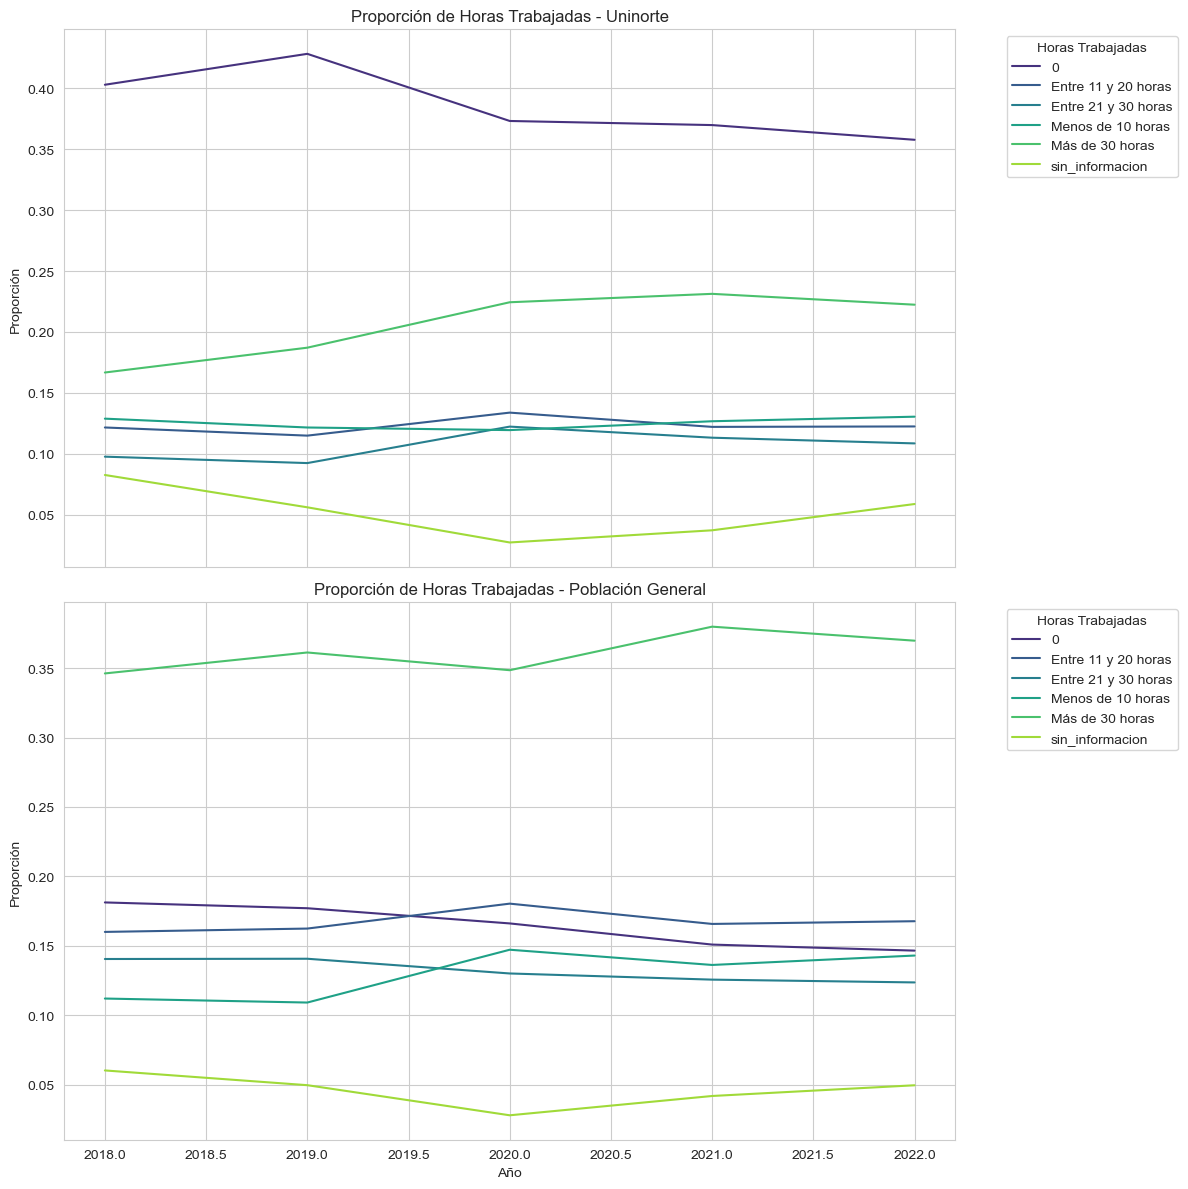

In [ ]:
# Extraer el año de PERIODO
uninorte['AÑO'] = uninorte['PERIODO'].astype(str).str[:4].astype(int)
df_combined['AÑO'] = df_combined['PERIODO'].astype(str).str[:4].astype(int)

# Lista de las categorías de horas trabajadas
category_order = sorted(df_combined['ESTU_HORASSEMANATRABAJA'].dropna().unique())

# Configurar el tamaño de los gráficos
fig, ax = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Gráfico para Uninorte
uninorte_proportions = uninorte.groupby(['AÑO', 'ESTU_HORASSEMANATRABAJA']).size().unstack(fill_value=0)
uninorte_proportions = uninorte_proportions.div(uninorte_proportions.sum(axis=1), axis=0)

# Graficar cada categoría de horas trabajadas como una línea en el tiempo
for category in category_order:
    if category in uninorte_proportions.columns:
        sns.lineplot(x=uninorte_proportions.index, y=uninorte_proportions[category], label=str(category), ax=ax[0])
ax[0].set_title('Proporción de Horas Trabajadas - Uninorte')
ax[0].set_ylabel('Proporción')
ax[0].legend(title="Horas Trabajadas", bbox_to_anchor=(1.05, 1), loc='upper left')
ax[0].grid(True)

# Gráfico para la población general
general_proportions = df_combined.groupby(['AÑO', 'ESTU_HORASSEMANATRABAJA']).size().unstack(fill_value=0)
general_proportions = general_proportions.div(general_proportions.sum(axis=1), axis=0)

# Graficar cada categoría de horas trabajadas como una línea en el tiempo
for category in category_order:
    if category in general_proportions.columns:
        sns.lineplot(x=general_proportions.index, y=general_proportions[category], label=str(category), ax=ax[1])
ax[1].set_title('Proporción de Horas Trabajadas - Población General')
ax[1].set_xlabel('Año')
ax[1].set_ylabel('Proporción')
ax[1].legend(title="Horas Trabajadas", bbox_to_anchor=(1.05, 1), loc='upper left')
ax[1].grid(True)

plt.tight_layout()
plt.show()


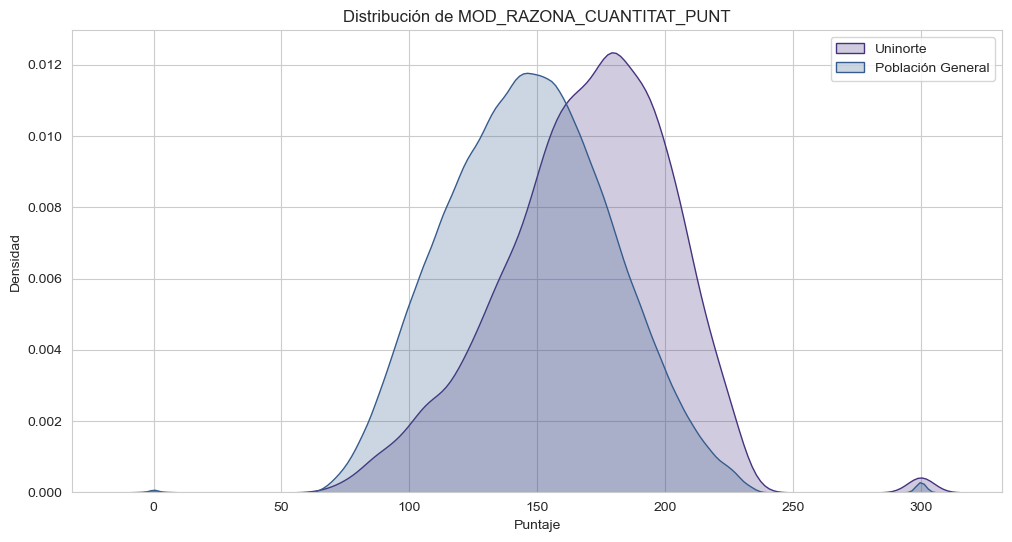

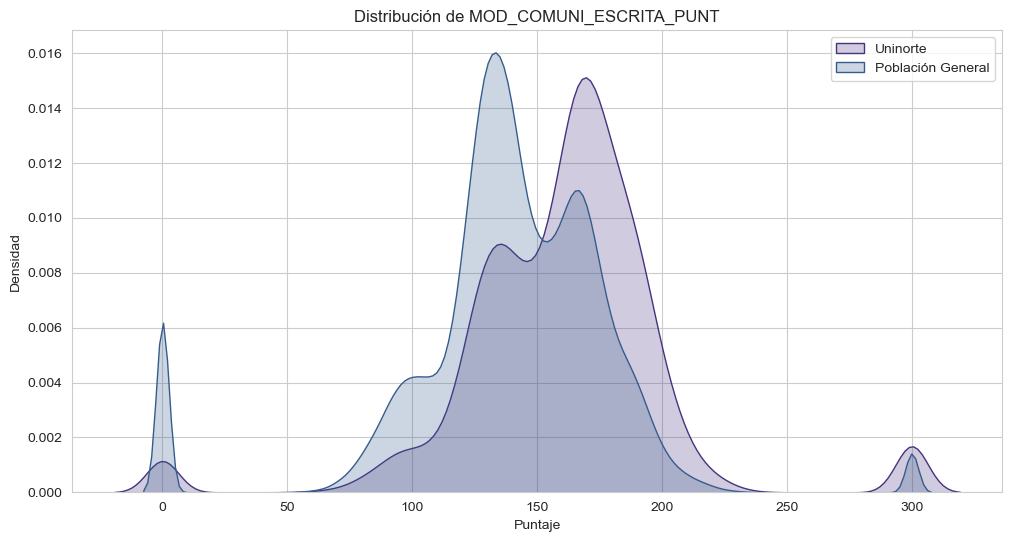

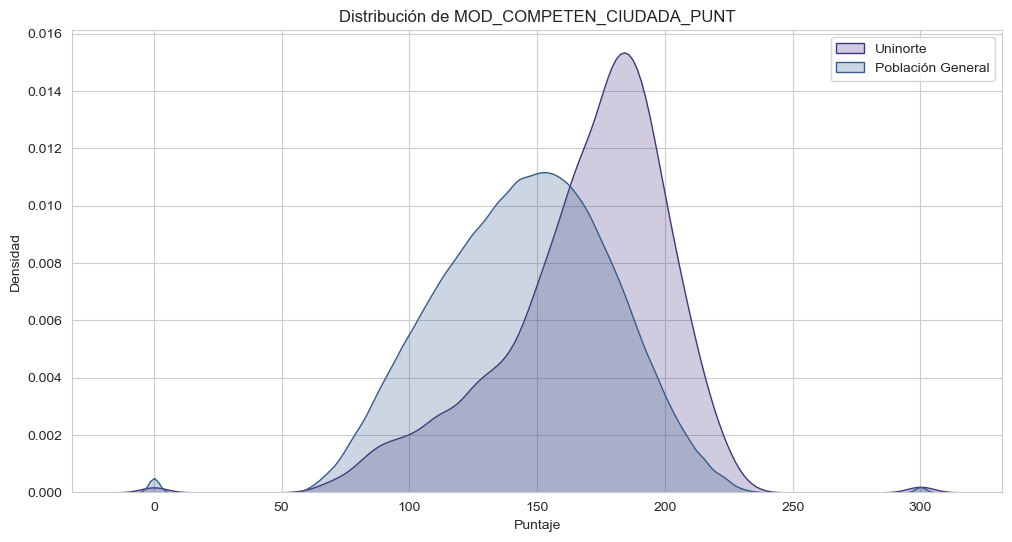

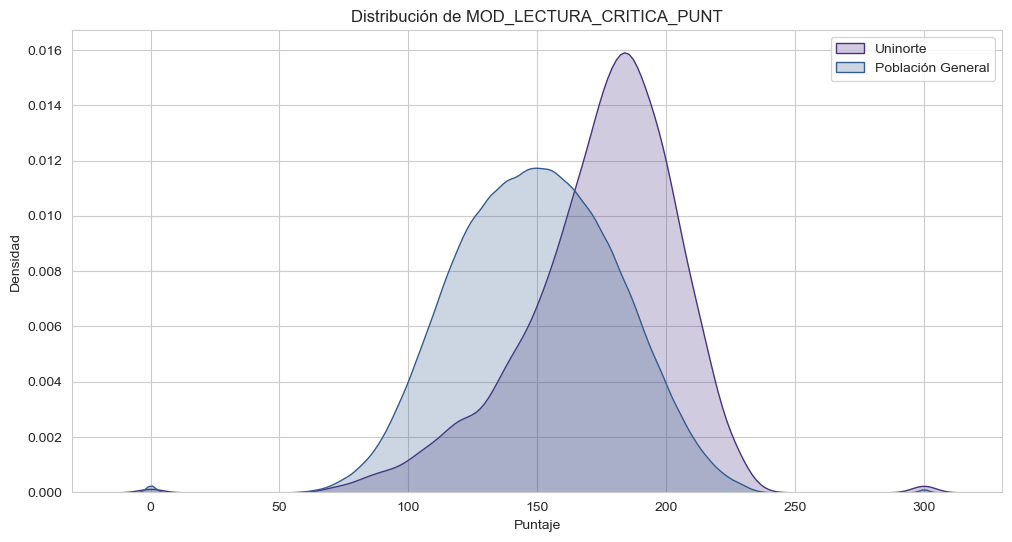

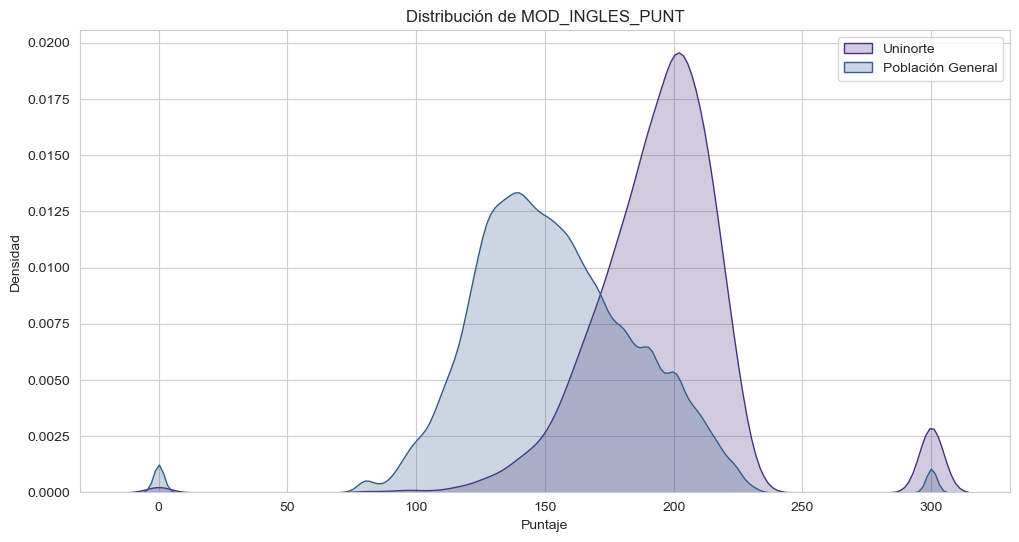

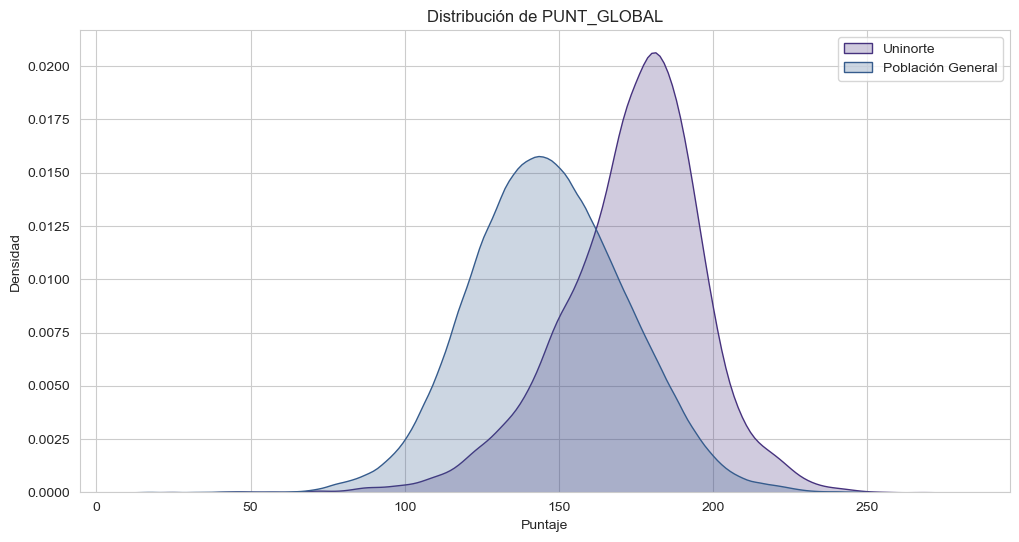

In [41]:
# Lista de las columnas de puntajes de las pruebas y del puntaje global
pruebas = [
    'MOD_RAZONA_CUANTITAT_PUNT', 'MOD_COMUNI_ESCRITA_PUNT', 
    'MOD_COMPETEN_CIUDADA_PUNT', 'MOD_LECTURA_CRITICA_PUNT', 
    'MOD_INGLES_PUNT', 'PUNT_GLOBAL'
]

# Iteramos sobre cada columna y generamos un gráfico KDE
for prueba in pruebas:
    plt.figure(figsize=(12, 6))
    sns.kdeplot(data=uninorte, x=prueba, label='Uninorte', fill=True)
    sns.kdeplot(data=df_combined, x=prueba, label='Población General', fill=True)
    plt.title(f'Distribución de {prueba}')
    plt.xlabel('Puntaje')
    plt.ylabel('Densidad')
    plt.legend()
    plt.show()


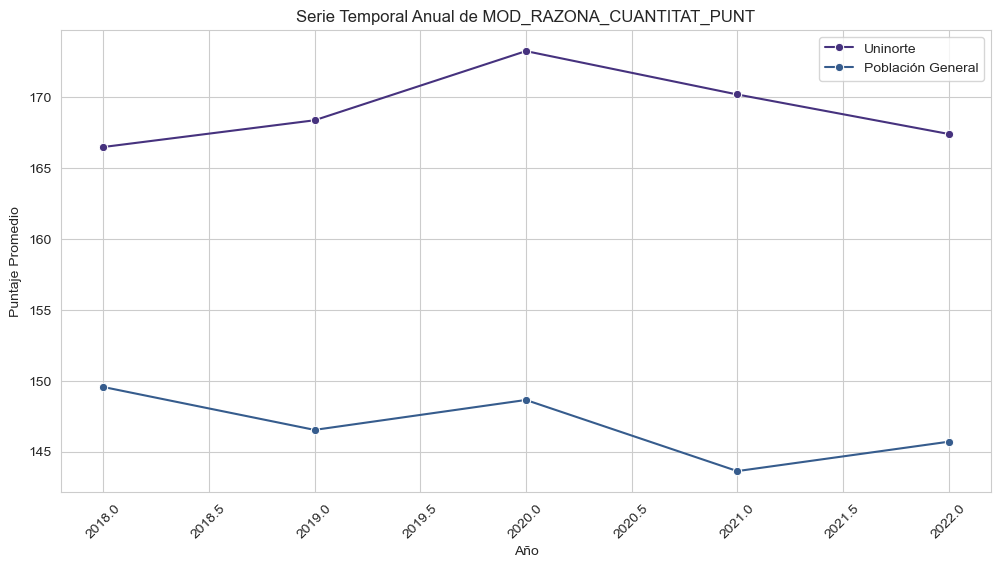

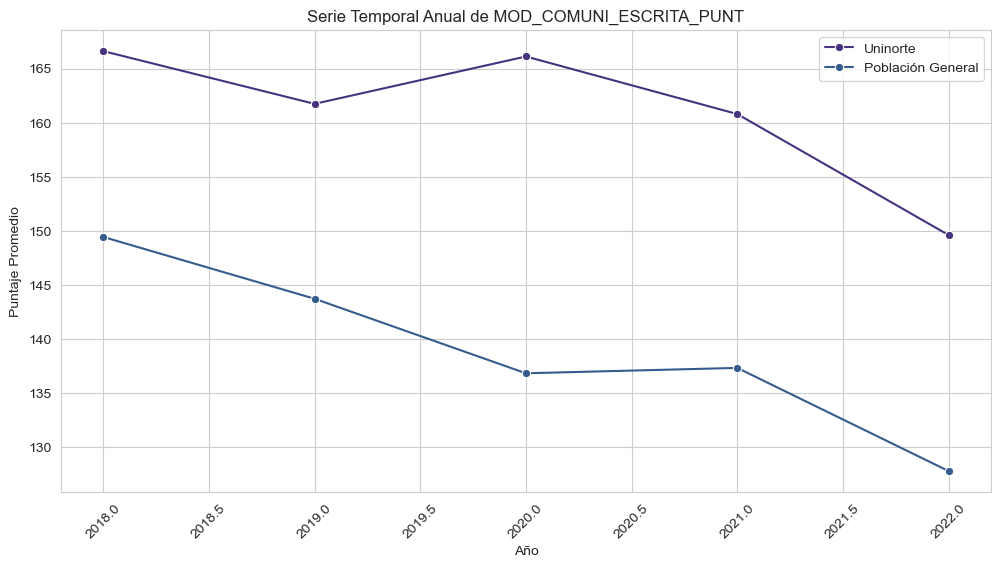

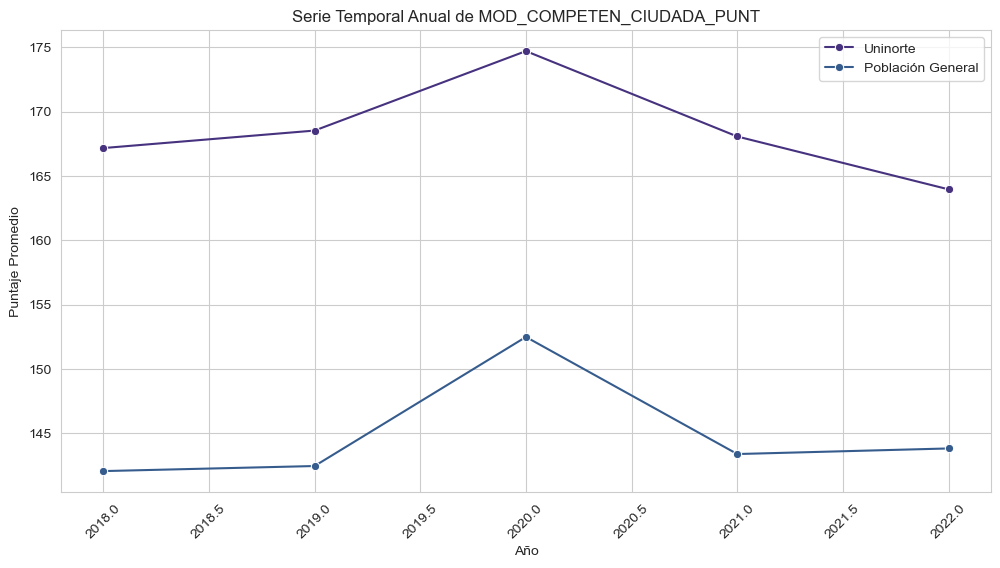

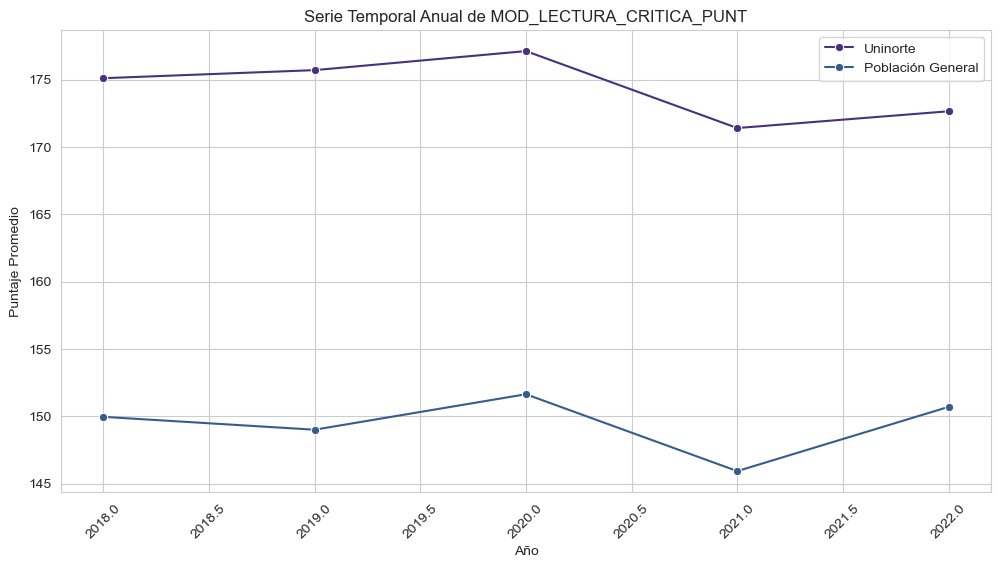

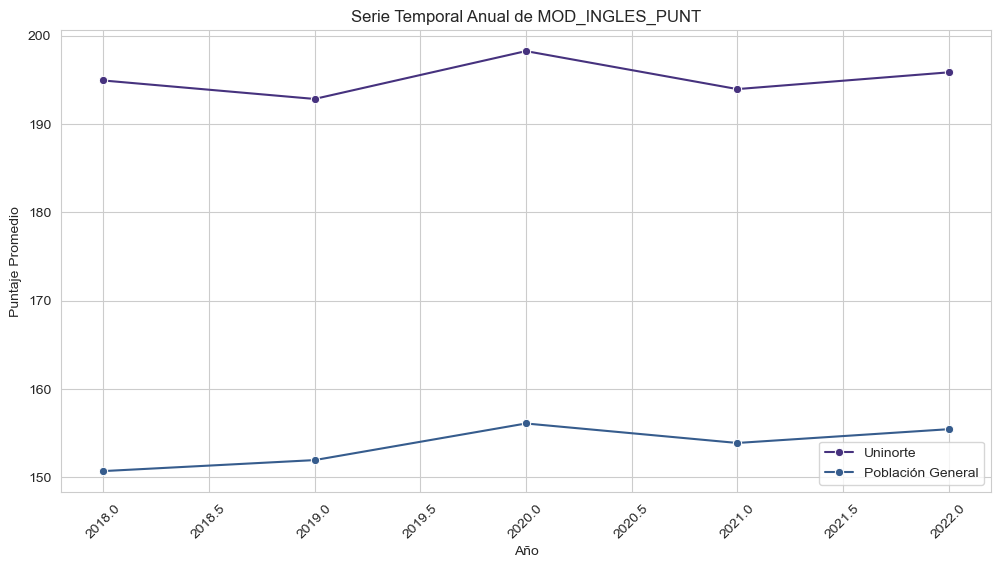

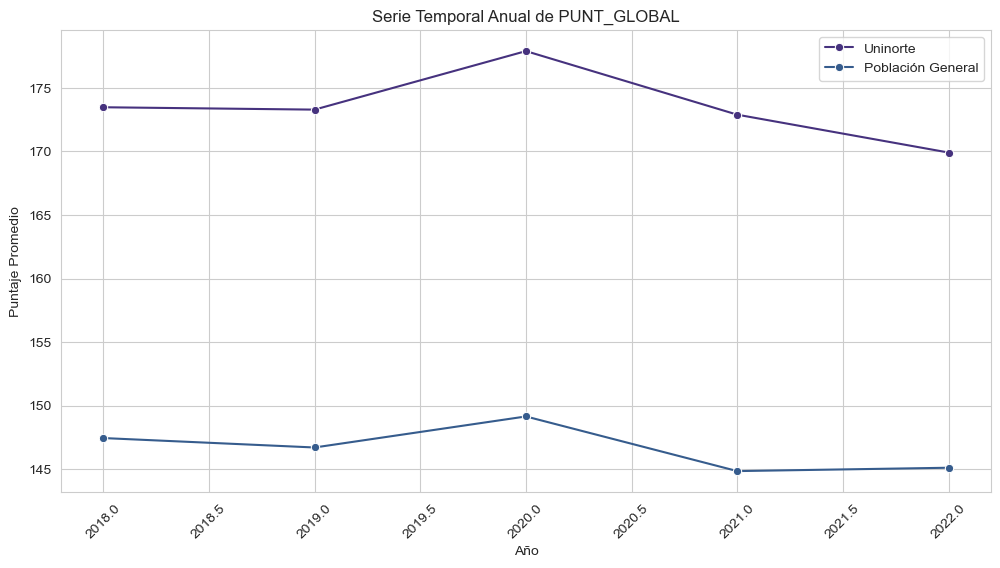

In [42]:
# Extraer el año de PERIODO
df_combined['AÑO'] = df_combined['PERIODO'].astype(str).str[:4].astype(int)
uninorte['AÑO']= uninorte['PERIODO'].astype(str).str[:4].astype(int)


# Crear gráficos de series temporales por cada prueba
for prueba in pruebas:
    plt.figure(figsize=(12, 6))
    
    # Calcular promedio de puntaje por AÑO para Uninorte y población general
    uninorte_mean = uninorte.groupby('AÑO')[prueba].mean()
    general_mean = df_combined.groupby('AÑO')[prueba].mean()
    
    # Graficar series temporales
    sns.lineplot(data=uninorte_mean, label='Uninorte', marker='o')
    sns.lineplot(data=general_mean, label='Población General', marker='o')
    
    # Configuración del gráfico
    plt.title(f'Serie Temporal Anual de {prueba}')
    plt.xlabel('Año')
    plt.ylabel('Puntaje Promedio')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()



In [44]:
df_combined.columns

Index(['PERIODO', 'ESTU_CONSECUTIVO', 'ESTU_VALORMATRICULAUNIVERSIDAD',
       'ESTU_COMOCAPACITOEXAMENSB11', 'ESTU_SEMESTRECURSA',
       'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'ESTU_HORASSEMANATRABAJA',
       'INST_COD_INSTITUCION', 'INST_NOMBRE_INSTITUCION',
       'ESTU_PRGM_ACADEMICO', 'ESTU_SNIES_PRGMACADEMICO', 'GRUPOREFERENCIA',
       'ESTU_PRGM_CODMUNICIPIO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_NUCLEO_PREGRADO', 'ESTU_INST_CODMUNICIPIO',
       'ESTU_INST_DEPARTAMENTO', 'INST_CARACTER_ACADEMICO',
       'MOD_RAZONA_CUANTITAT_PUNT', 'MOD_RAZONA_CUANTITAT_DESEM',
       'MOD_LECTURA_CRITICA_PUNT', 'MOD_LECTURA_CRITICA_DESEM',
       'MOD_COMPETEN_CIUDADA_PUNT', 'MOD_COMPETEN_CIUDADA_DESEM',
       'MOD_INGLES_PUNT', 'MOD_INGLES_DESEM', 'MOD_COMUNI_ESCRITA_PUNT',
       'MOD_COMUNI_ESCRITA_DESEM', 'PUNT_GLOBAL',
       'ESTU_COD_COLE_MCPIO_TERMINO', 'ESTU_COD_DEPTO_PRESENTACION',
       'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_COD_RESIDE_DEPTO',
       'ESTU_COD_RESIDE_MC

## Análisis de correspondencia multiple

In [ ]:
import prince

# Seleccionar solo las variables categóricas
categorical_cols = df_combined.select_dtypes(include=['object']).columns

# Llenar valores nulos con una categoría temporal
#

# Aplicar MCA
mca = prince.MCA(n_components=10)
mca = mca.fit(df_categorical)

# Graficar los primeros dos componentes del MCA
mca.plot_coordinates(X=df_categorical, show_row_points=False, show_column_labels=True)
plt.title('Análisis de Correspondencia Múltiple (MCA)')
plt.show()
